# MP/BME 573: Homework Set 5 - Solutions

In [14]:
## MP 573 HW5 - Solutions
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd

font = {'weight' : 'normal',
        'size'   : 20}

In [21]:
# This function calculates the cost function, its gradient vector, and its Hessian matrix
# for the problem in this homework set. Note that the correct choice of the diagonal matrix C
# needs to be uncommented depending on which version of the problem we are trying to solve
def evalGradients(x):

    A = np.array([[1, 2, 3], 
    [0, 2, 1],
    [4, 0, 1]])
    

    C = np.diag([400,20,1])
    # C = np.diag([20,20,20]) # Uncomment 
    
    Q = (A.T).dot(C.dot(A))
    
    d = np.array([[100], 
    [100],
    [100]])

    f = 0.5*(x.T).dot(Q.dot(x)) - (x.T).dot(d)

    g = Q.dot(x) - d
    
    H = Q
    
    
    return f,g,H


Algorithm: Steepest Descent
Done. Cost function value:
[[-260.79392379]]
Final estimate xhat:
[[ 6.0065094 ]
 [ 2.72720352]
 [-3.80880069]]


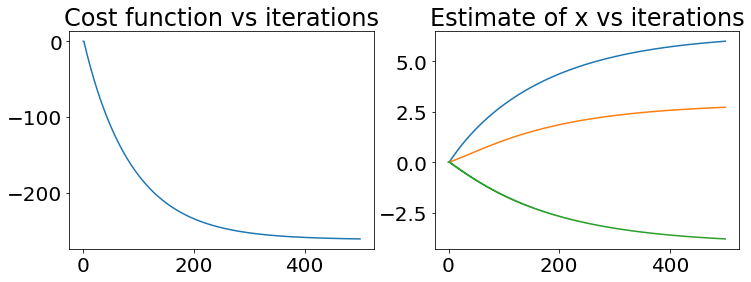

In [22]:
print('Algorithm: Steepest Descent')
x = np.array([[0],[0],[0]]) # Initialize
f,g,H = evalGradients(x) # Evaluate cost and gradient (and Hessian, although we don't use it here)
allx = x # Keep track of all the estimates throughout our iterations
allf = f # Keep track of the cost function throughout our iterations
niter = 500 # Max number of iterations
for k in range(0,niter):
    f,g,H = evalGradients(x) # Evaluate cost and gradient
    if la.norm(g)>0.000001: # If the gradient is not tiny (ie: if not converged yet)
        d = -g # SD direction is the opposite of the gradient
        a0 = 0 # Initialize line search (golden section search)
        b0 = 1 # Initialize line search (golden section search)
        for kg in range(0,200): # GS iterations in this loop
            a1 = x + d*a0 + d*(b0-a0)*0.382;
            b1 = x + d*a0 + d*(b0-a0)*0.618;
            fa1,temp1,temp2 = evalGradients(a1);
            fb1,temp1,temp2 = evalGradients(b1);
            if fb1<fa1:
                a0 = a0 + 0.382*(b0-a0);
            else:
                b0 = a0 + 0.618*(b0-a0);
                    
              
        alpha = (a0+b0)/2; # Set our step size after GS iterations
        allx = np.concatenate((allx,x),axis=1) # Update our array of estimates
        allf = np.concatenate((allf,f),axis=1) # Update our array of cost values
        x = x +alpha*d; # Update our current estimate
              
# Display results    
print('Done. Cost function value:')
print(f)
print('Final estimate xhat:')
print(x)

# Plot evolution of our estimates    
plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');

Algorithm: Conjugate Gradients
Done. Cost function value:
[[-261.73469388]]
Final estimate xhat:
[[ 6.37244898]
 [ 2.92346939]
 [-4.06122449]]


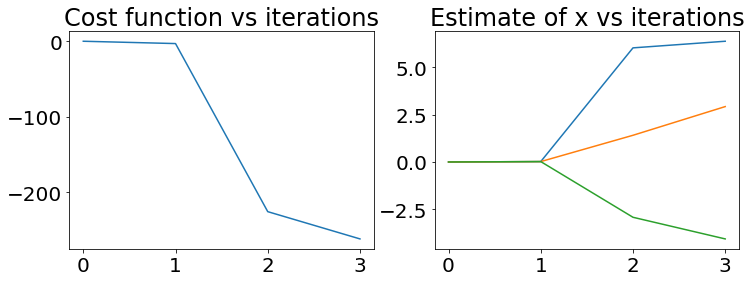

In [9]:
print('Algorithm: Conjugate Gradients')
x = np.array([[0],[0],[0]]) # Initialize
f,g,Q = evalGradients(x) # Calculate cost and gradient
allx = x
allf = f
niter = 500
if la.norm(g)>0.000001: # If gradient is not tiny, proceed
    d = -g # Set direction
    k=0; # Initialize CG
    while k < niter: # CG iterations
        a = -((g.T).dot(d))/((d.T).dot(Q.dot(d))); # Automatic step size
        x = x + a*d; # Update estimate
        f,g,Q = evalGradients(x) # Calculate function and gradient
        allx = np.concatenate((allx,x),axis=1) # Keep track of all our estimates
        allf = np.concatenate((allf,f),axis=1) # Keep track of all our cost function values
        if la.norm(g)>0.000001: # If the gradient is not tiny, update the CG direction
            b = ((g.T).dot(Q.dot(d)))/((d.T).dot(Q.dot(d)));
            d = -g + b*d;
        else: # If the gradient is tiny, we are done
            k = niter
        k = k+1
        
# Print results    
print('Done. Cost function value:')
print(f)
print('Final estimate xhat:')
print(x)

# Plot evolution of our estimates  
plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');


Algorithm: Newton
Done. Cost function value:
[[-261.73469388]]
Final estimate xhat:
[[ 6.37244898]
 [ 2.92346939]
 [-4.06122449]]


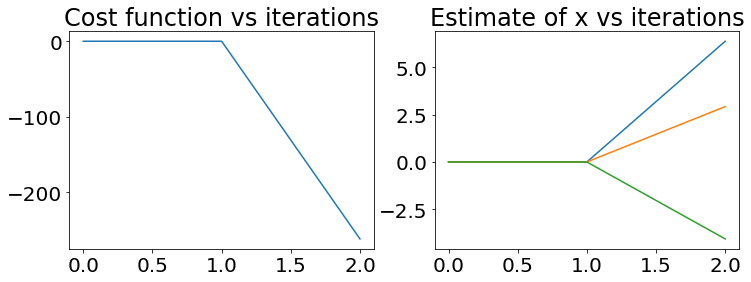

In [10]:
print('Algorithm: Newton')
x = np.array([[0],[0],[0]]) # Initialize
f,g,H = evalGradients(x) # Calculate cost, gradient, and Hessian
allx = x
allf = f
niter = 500
k = 0
while k < niter: # Newton iterations
    f,g,H = evalGradients(x) # Calculate cost, gradient, and Hessian (although we don't use the cost)
    allx = np.concatenate((allx,x),axis=1)
    allf = np.concatenate((allf,f),axis=1)        
    if la.norm(g)>0.000001: # It gradient is not tiny, do Newton step
        x = x - la.inv(H).dot(g) # Here's the Newton step
    else: # If gradient is tiny, we are done
        k=niter
    k=k+1    
    
# Print results    
print('Done. Cost function value:')
print(f)
print('Final estimate xhat:')
print(x)

# Plot evolution of our estimates  
plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');


